# Chapter 3 — The Hydrogen Atom


### 3.1 Schrödinger Equation Setup

The hydrogen atom is approximated as an electron of mass $m_e$ moving in the Coulomb potential of a point-like proton. Taking the reduced mass $\mu \approx m_e$, the time-independent Schrödinger equation is

$$\left[-\frac{\hbar^2}{2\mu}\nabla^2 - \frac{e^2}{4\pi \varepsilon_0 r}\right]\psi(\mathbf{r}) = E\psi(\mathbf{r}).$$

Key assumptions: non-relativistic dynamics, electrostatic interaction only, and a stationary proton. The goal is to determine physically acceptable (normalisable, single-valued) solutions $\psi$ together with their discrete energies $E$.

### Exploiting Spherical Symmetry

Because the Coulomb potential depends only on $r = |\mathbf{r}|$, the Laplacian in spherical coordinates splits into radial and angular parts. A separated ansatz $\psi(r,\theta,\phi) = R(r)Y(\theta,\phi)$ leads to an eigenvalue problem for the angular momentum operator:

$$\hat{L}^2 Y(\theta,\phi) = \hbar^2 \ell(\ell+1) Y(\theta,\phi).$$

The solutions are the spherical harmonics $Y_{\ell m}$ with quantum numbers $\ell = 0,1,2,\dots$ and $m = -\ell,\dots,\ell$. Every hydrogen eigenstate therefore labels an angular momentum sector and leaves a purely radial equation to solve.

### Radial Equation and Boundary Conditions

Substituting the separated form back into the Schrödinger equation yields the radial equation

$$\left[-\frac{\hbar^2}{2\mu}\frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{d}{dr}\right) - \frac{e^2}{4\pi\varepsilon_0 r} + \frac{\hbar^2 \ell(\ell+1)}{2\mu r^2}\right]R(r) = E R(r).$$

Regularity at the origin and exponential decay as $r \to \infty$ restrict the radial solutions to a discrete set. Introducing $u(r) = r R(r)$ converts the equation into a confluent hypergeometric form that admits polynomial solutions only for particular principal quantum numbers.

### Quantisation and Radial Wavefunctions

Requiring the confluent hypergeometric series to terminate imposes the principal quantum number $n = 1,2,3,\dots$ with the constraint $\ell = 0,1,\dots,n-1$. The normalised radial functions can be written in terms of associated Laguerre polynomials $L^{2\ell+1}_{n-\ell-1}$:

$$R_{n\ell}(r) = \frac{2}{n a_0}\sqrt{\frac{(n-\ell-1)!}{[(n+\ell)!]^3}}\left(\frac{2r}{n a_0}\right)^{\ell} e^{-r/(n a_0)} L^{2\ell+1}_{n-\ell-1}\left(\frac{2r}{n a_0}\right),$$

where $a_0 \approx 0.529\,\text{Å}$ is the Bohr radius. The full hydrogen wavefunction is the product of radial and angular parts:

$$\psi_{n\ell m}(r,\theta,\phi) = R_{n\ell}(r) \, Y_{\ell m}(\theta,\phi),$$

with spherical harmonics $Y_{\ell m}(\theta,\phi)$ given by

$$Y_{\ell m}(\theta,\phi) = (-1)^m \sqrt{\frac{(2\ell+1)}{4\pi} \frac{(\ell-m)!}{(\ell+m)!}} \, P_\ell^m(\cos\theta) \, e^{i m \phi},$$

where $P_\ell^m$ are associated Legendre polynomials. Restricting to low-lying states reproduces the familiar $1s$, $2s$, and $2p$ orbitals.

### Energy Spectrum and Degeneracy

The allowed energies depend only on $n$, giving the *gross structure* of hydrogen:

$$E_n = -\frac{\mu e^4}{2 (4\pi\varepsilon_0)^2 \hbar^2} \frac{1}{n^2} = -\frac{13.6\,\text{eV}}{n^2}.$$

For each $n$, there are $n^2$ degenerate states corresponding to all $\ell$ and $m$ combinations. Later chapters add fine-structure corrections that split this degeneracy via relativistic, spin-orbit, and Lamb-shift effects.

### Comparison with the Bohr Model (Non-examinable)

The Bohr model predicts circular orbits with quantised angular momentum $L = n\hbar$ and the same $1/n^2$ energy scaling. The quantum treatment improves on Bohr by providing wavefunctions, probability densities, and selection rules. Classical notions such as definite trajectories are replaced by stationary states with radial probability distributions $P_{n\ell}(r) = r^2 |R_{n\ell}(r)|^2$.

### Spectral Series and Selection Rules

Transitions between stationary states produce spectral lines that fall into the Lyman ($n_f = 1$), Balmer ($n_f = 2$), Paschen ($n_f = 3$), and higher series. The Einstein $A$ and $B$ coefficients quantify spontaneous and stimulated processes. Dipole selection rules emerge from the angular integrals: $\Delta \ell = \pm 1$ and $\Delta m = 0, \pm 1$, setting the allowed lines that appear in the hydrogen spectrum.

### Plots of Hydrogen Atom Wavefunctions and Energies

In this section, we compute and visualize the radial wavefunctions, probability densities, and energy levels for the hydrogen atom.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import genlaguerre, lpmv
from scipy.constants import physical_constants
import seaborn as sns

# Apply a professional plot style
sns.set_context("poster")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Constants
a0 = physical_constants['Bohr radius'][0]  # Bohr radius in meters
hbar = physical_constants['Planck constant over 2 pi'][0]
e = physical_constants['elementary charge'][0]
eps0 = physical_constants['vacuum electric permittivity'][0]
me = physical_constants['electron mass'][0]
mu = me  # reduced mass approx

# Energy unit conversion to eV
E0 = (mu * e**4) / (2 * (4 * np.pi * eps0)**2 * hbar**2) / 1.602e-19  # in eV

In [3]:
from scipy.special import factorial

def radial_wavefunction(n, l, r_a0):
    """
    Compute the radial wavefunction R_nl(r) for hydrogen atom.
    r_a0 is the radius in units of a0.
    """
    rho = 2 * r_a0 / n
    # Corrected normalization factor
    norm = np.sqrt((2.0 / (n * a0))**3 * factorial(n - l - 1) / (2.0 * n * factorial(n + l)))
    laguerre = genlaguerre(n - l - 1, 2 * l + 1)(rho)
    
    # The wavefunction in terms of r, not r_a0
    r = r_a0 * a0
    return norm * np.exp(-rho / 2.0) * rho**l * laguerre

def probability_density(n, l, r_a0):
    """
    Compute the radial probability density P_nl(r) = r^2 |R_nl(r)|^2
    r_a0 is the radius in units of a0.
    """
    r = r_a0 * a0
    R = radial_wavefunction(n, l, r_a0)
    return r**2 * np.abs(R)**2

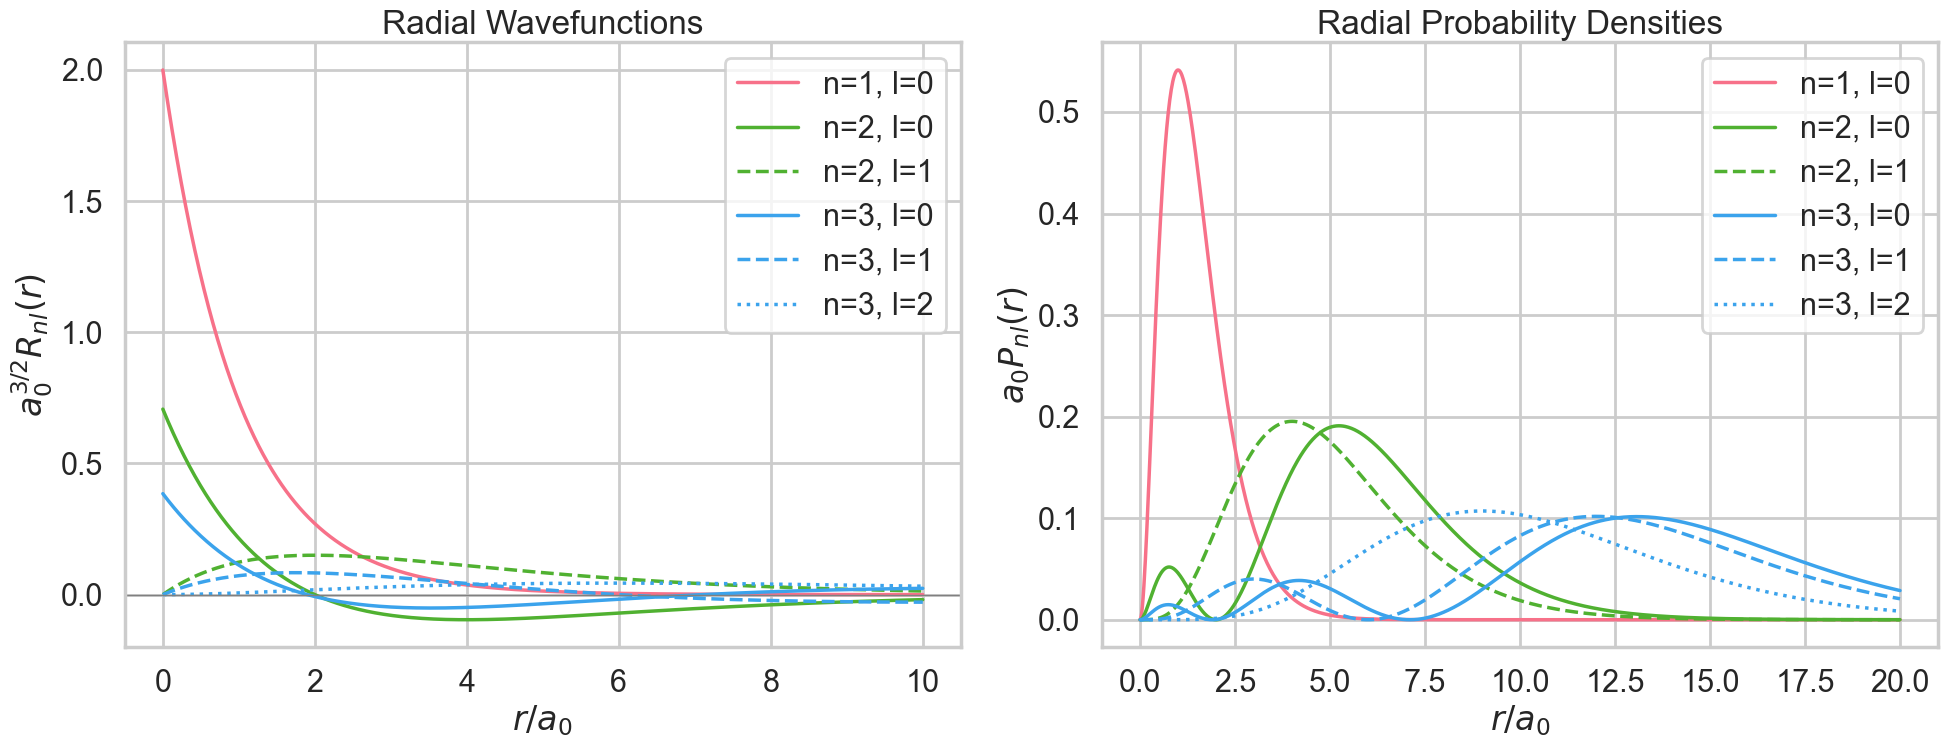

In [4]:
# Prepare two ranges: one for radial wavefunctions (0-10 a0) and one for probability densities (0-20 a0)
r_R_a0 = np.linspace(0, 10, 1000)
r_P_a0 = np.linspace(0, 20, 1000)

plt.figure(figsize=(20, 8))

# Radial wavefunctions (left)
plt.subplot(1, 2, 1)
colors = sns.color_palette("husl", 3)
linestyles = ['-', '--', ':']
for n in range(1, 4):
    for l in range(n):
        # We need to scale the wavefunction for plotting, as R_nl is in m^(-3/2)
        # Let's plot a0^(3/2) * R_nl for a dimensionless quantity
        R = a0**(3/2) * radial_wavefunction(n, l, r_R_a0)
        label = f'n={n}, l={l}'
        plt.plot(r_R_a0, R, color=colors[n-1], linestyle=linestyles[l], linewidth=2.5, label=label)

plt.xlabel(r'$r / a_0$')
plt.ylabel(r'$a_0^{3/2} R_{nl}(r)$')
plt.title('Radial Wavefunctions')
plt.legend()
plt.axhline(0, color='gray', linewidth=1)

# Radial probability densities (right)
plt.subplot(1, 2, 2)
for n in range(1, 4):
    for l in range(n):
        # Probability density is P(r)dr = r^2 |R|^2 dr
        # To make it dimensionless, we plot a0 * P(r)
        P = a0 * probability_density(n, l, r_P_a0)
        label = f'n={n}, l={l}'
        plt.plot(r_P_a0, P, color=colors[n-1], linestyle=linestyles[l], linewidth=2.5, label=label)

plt.xlabel(r'$r / a_0$')
plt.ylabel(r'$a_0 P_{nl}(r)$')
plt.title('Radial Probability Densities')
plt.legend()

plt.tight_layout()
plt.show()

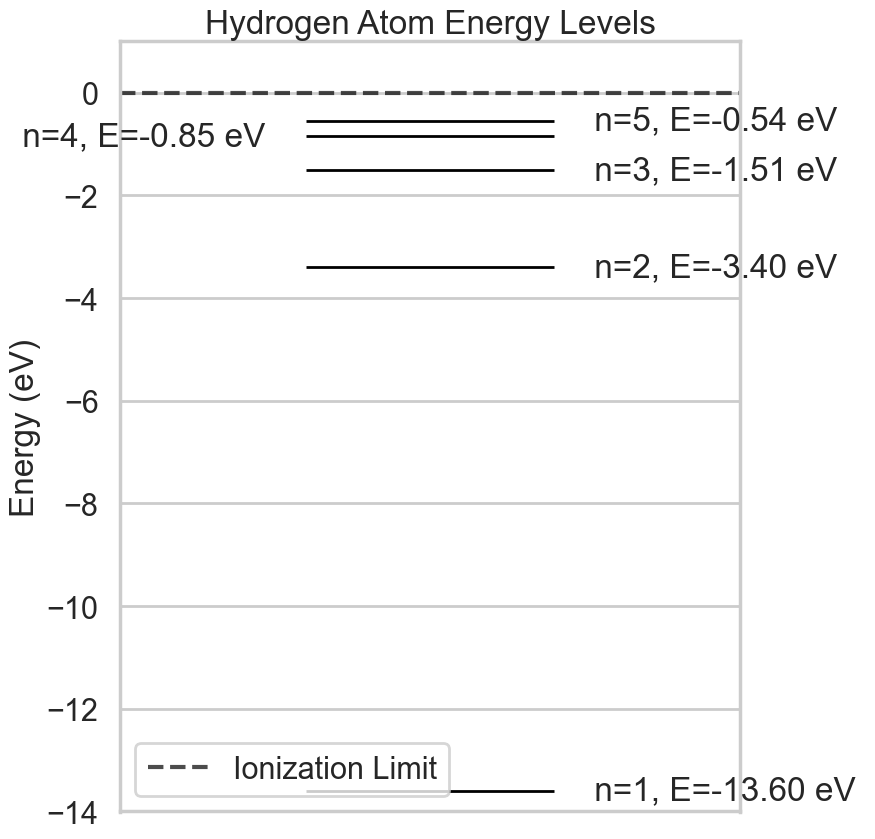

In [5]:
# Energy levels styled as a proper energy level diagram
n_values = np.arange(1, 6)
energies = -13.6 / n_values**2  # in eV

plt.figure(figsize=(8, 10))

for n in range(1, len(n_values) + 1):
    energy = -13.6 / n**2
    plt.hlines(energy, 0.1, 0.9, color='k', linewidth=2)
    
    # Alternate label positions to avoid overlap
    if n % 2 != 0 or n < 3:
        x_pos, ha = 1.0, 'left'
    else:
        x_pos, ha = 0.0, 'right'
        
    plt.text(x_pos, energy, f' n={n}, E={energy:.2f} eV ', va='center', ha=ha)

plt.ylabel('Energy (eV)')
plt.title('Hydrogen Atom Energy Levels')
plt.xticks([]) # No x-ticks needed for this diagram style
plt.xlim(-0.5, 1.5)
plt.ylim(-14, 1)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.7, label='Ionization Limit')
plt.legend(loc='lower left')
plt.show()

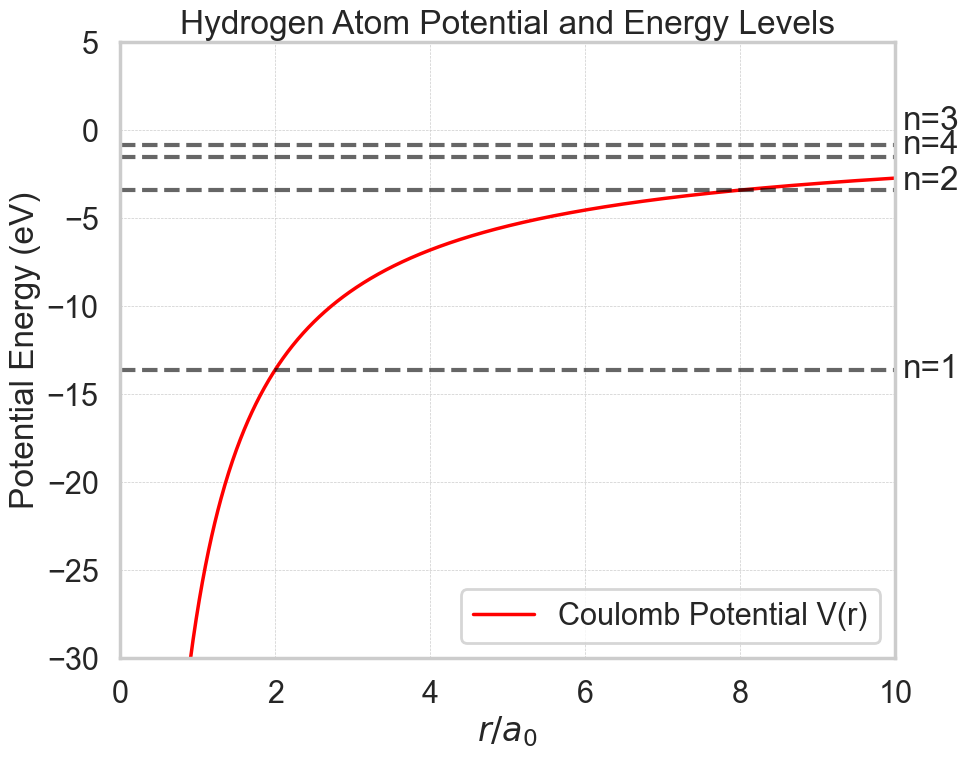

In [6]:
# Plot the Coulomb potential
r_potential_a0 = np.linspace(0.01, 10, 1000)
r_potential = r_potential_a0 * a0
V_coulomb = -e**2 / (4 * np.pi * eps0 * r_potential) / 1.602e-19  # in eV

plt.figure(figsize=(10, 8))
plt.plot(r_potential_a0, V_coulomb, 'r-', linewidth=2.5, label='Coulomb Potential V(r)')

# Overlay energy levels
for n in range(1, 5):
    energy = -13.6 / n**2
    plt.hlines(energy, 0, 10, color='k', linestyle='--', alpha=0.6)
    
    # Adjust text position to avoid overlap
    y_pos = energy
    if n == 2:
        y_pos += 0.5  # Move n=2 label up
    elif n == 3:
        y_pos = 0.5  # Move n=3 label down
        
    plt.text(10.1, y_pos, f'n={n}', va='center')

plt.xlabel(r'$r / a_0$')
plt.ylabel('Potential Energy (eV)')
plt.title('Hydrogen Atom Potential and Energy Levels')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(-30, 5)
plt.xlim(0, 10)
plt.legend(loc='lower right')
plt.show()

### Visualization of Spherical Harmonics

Spherical harmonics $Y_{\ell m}(\theta, \phi)$ are the angular part of the hydrogen wavefunctions. Here we visualize the real part of some low-order spherical harmonics plotted on the surface of a sphere.

C:\Users\singh\AppData\Local\Temp\ipykernel_5548\659563897.py:11: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  Y_lm = sph_harm(m, l, theta, phi)


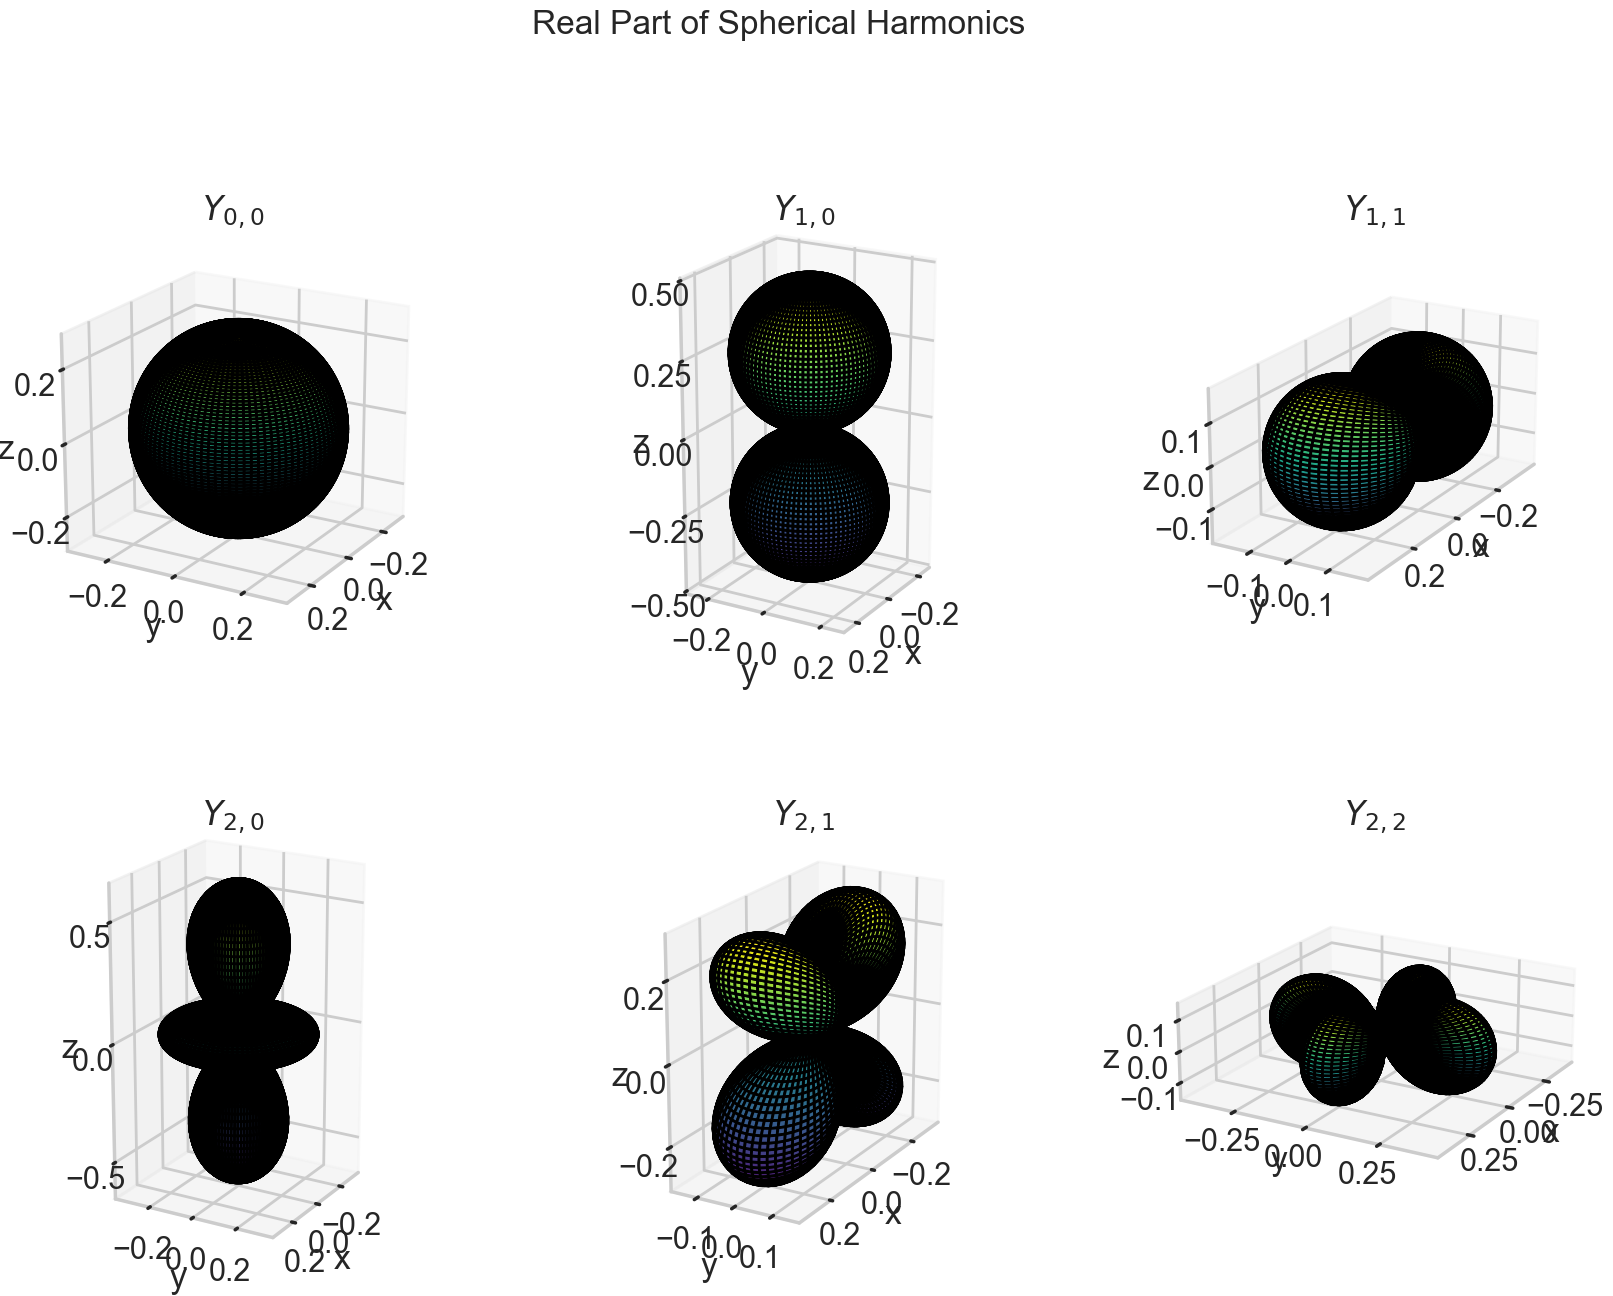

In [8]:
from scipy.special import sph_harm

# Create a grid of angles
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

def plot_spherical_harmonic(ax, l, m):
    """Plot the real part of the spherical harmonic Y_lm on a 3D axis."""
    # Calculate the spherical harmonic for each point on the grid
    Y_lm = sph_harm(m, l, theta, phi)
    
    # We plot the real part of Y_lm. The radius of the sphere is its absolute value.
    r = np.abs(np.real(Y_lm))
    
    # Convert to Cartesian coordinates for 3D plotting
    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)
    
    # Plot the surface
    ax.plot_surface(x, y, z, cmap='viridis', edgecolor='k', rstride=1, cstride=1)
    
    # Set plot properties
    ax.set_title(f'$Y_{{{l},{m}}}$')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev=20, azim=30)
    ax.set_aspect('equal')

# Create subplots for a few (l, m) combinations
fig = plt.figure(figsize=(20, 15))
l_values = [0, 1, 1, 2, 2, 2]
m_values = [0, 0, 1, 0, 1, 2]

for i, (l, m) in enumerate(zip(l_values, m_values)):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    plot_spherical_harmonic(ax, l, m)

plt.suptitle('Real Part of Spherical Harmonics', fontsize=24)
fig.subplots_adjust(wspace=0.4, hspace=0.1)
plt.show()